In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
df.shape

(269, 71)

In [5]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [7]:
# Let's rename the new column names to the original datasets

columns = ['Gender','Age','City','PinCode','ShoppingSince','ShoppingFrequencySince_1year','InternetAccessibility','DeviceUsed',
           'ScreenSize','OS', 'BrowserUsed','ChannelFirstUsed','LoginMode','TimeSpentDeciding','PaymentMode',
           'AbandonMakingPaymentFrequency','AbandonReason','ContentReadability','HighlightSimilarProductInfo',
           'SellerProductInfo','ProductInfoClarity','NavigationEase','LoadingProcessingSpeed','UserFrienlyInterface',
           'ConveninetPaymentMode','TimelyFulfilmentTrust','CustSupportResponse','CustPrivacyGuarantee',
           'VariousChannelResponses','OnlineShoppingBenefit','Enjoyment','Convenient','ReturnReplacementPolicy',
           'LoyaltyProgramsAccess','InfoSatisfaction','SiteQualitySatisfaction','NetBenefitSatisfaction','Trust',
           'ProductSeveralCategory','RelevantProductInfo','MonetarySavings','PatronizingConvenience','AdventureSense',
           'EnhanceSocialStatus','Gratification','RoleFulfilment','MoneyWorthy','ShoppedFrom','EasyWebApp',
           'VisuallyAppealingWebApp','ProductVariety','CompleteProductInfo','FastWebApp','ReliableWebApp','QuickPurchase',
           'PaymentOptionsAvailability','SpeedyDelivery','CustInfoPrivacy','Financial_InfoSecurity','PerceivedTrustworthiness',
           'MultiChannelAssistance','LongLoginTime','LongDisplayTime','LatePriceDeclare','LongLoadingTime','LimitedPaymentMode',
           'LongerDeliveryPeriod','WebAppDesignChange','FrequentPageDisruption','WebAppEfficiency','Recommendation']

df.columns = columns


In [8]:

df.head()

,Gender,Age,City,PinCode,ShoppingSince,ShoppingFrequencySince_1year,InternetAccessibility,DeviceUsed,ScreenSize,OS,...,LongLoginTime,LongDisplayTime,LatePriceDeclare,LongLoadingTime,LimitedPaymentMode,LongerDeliveryPeriod,WebAppDesignChange,FrequentPageDisruption,WebAppEfficiency,Recommendation
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [9]:
df.select_dtypes('object').columns

Index(['Gender', 'Age', 'City', 'ShoppingSince',
       'ShoppingFrequencySince_1year', 'InternetAccessibility', 'DeviceUsed',
       'ScreenSize', 'OS', 'BrowserUsed', 'ChannelFirstUsed', 'LoginMode',
       'TimeSpentDeciding', 'PaymentMode', 'AbandonMakingPaymentFrequency',
       'AbandonReason', 'ContentReadability', 'HighlightSimilarProductInfo',
       'SellerProductInfo', 'ProductInfoClarity', 'NavigationEase',
       'LoadingProcessingSpeed', 'UserFrienlyInterface',
       'ConveninetPaymentMode', 'TimelyFulfilmentTrust', 'CustSupportResponse',
       'CustPrivacyGuarantee', 'VariousChannelResponses',
       'OnlineShoppingBenefit', 'Enjoyment', 'Convenient',
       'ReturnReplacementPolicy', 'LoyaltyProgramsAccess', 'InfoSatisfaction',
       'SiteQualitySatisfaction', 'NetBenefitSatisfaction', 'Trust',
       'ProductSeveralCategory', 'RelevantProductInfo', 'MonetarySavings',
       'PatronizingConvenience', 'AdventureSense', 'EnhanceSocialStatus',
       'Gratification', 'R

In [10]:
df.describe()

,PinCode
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         269 non-null    object
 1   Age                            269 non-null    object
 2   City                           269 non-null    object
 3   PinCode                        269 non-null    int64 
 4   ShoppingSince                  269 non-null    object
 5   ShoppingFrequencySince_1year   269 non-null    object
 6   InternetAccessibility          269 non-null    object
 7   DeviceUsed                     269 non-null    object
 8   ScreenSize                     269 non-null    object
 9   OS                             269 non-null    object
 10  BrowserUsed                    269 non-null    object
 11  ChannelFirstUsed               269 non-null    object
 12  LoginMode                      269 non-null    object
 13  TimeS

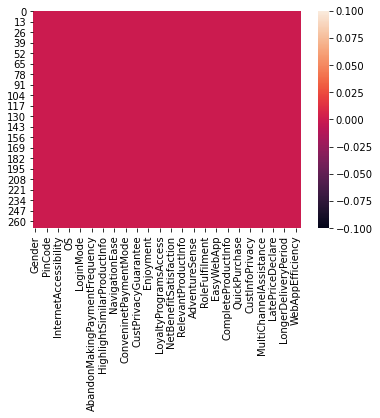

In [12]:
sns.heatmap(df.isnull())
plt.show()

There is no null value in the dataset .

In [13]:
# categorical_columns are avaialable from column index 0 to 16
categorical_columns=df.iloc[:,:17].columns
categorical_columns=categorical_columns.to_list()


# rating_columns are avaialable from column index 17 to 46
rating_columns=df.iloc[:,17:47].columns
rating_columns=rating_columns.to_list()


# ecommerce_columns are avaialable from column index 47 and above
ecommerce_columns=df.iloc[:,47:].columns
ecommerce_columns=ecommerce_columns.to_list()

						 Gender 

Female    181
Male       88
Name: Gender, dtype: int64


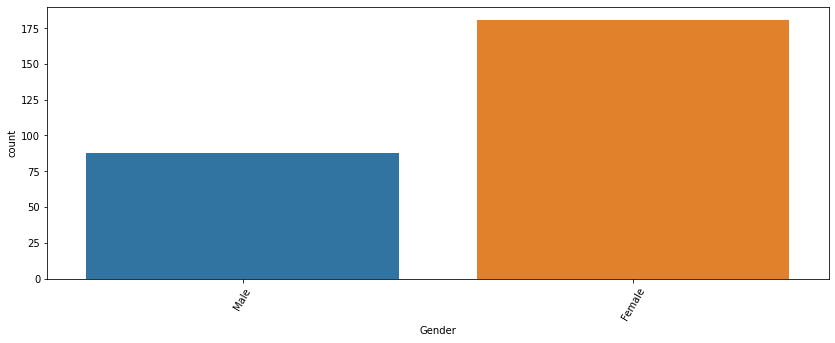

						 Age 

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


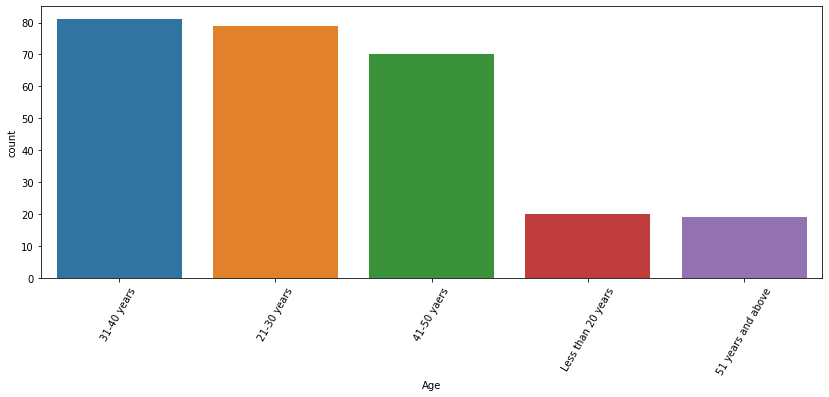

						 City 

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64


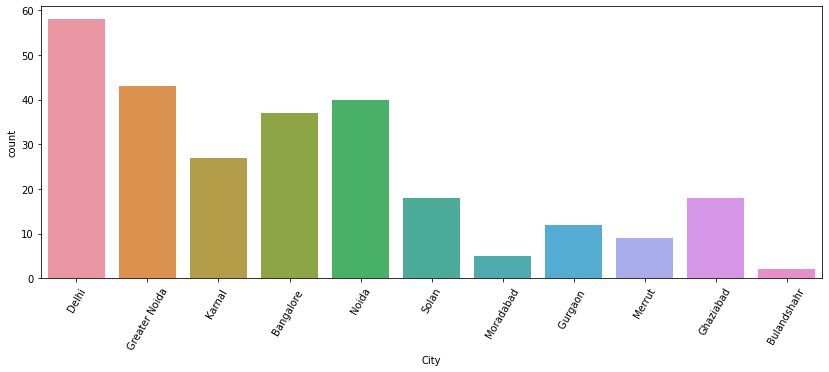

						 PinCode 

201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068     5
201005     4
110009     4
110042     4
110039     4
110030     4
201304     4
122009     4
201303     4
560018     4
201001     4
560003     4
560002     4
560013     3
203001     2
203207     1
560001     1
203202     1
Name: PinCode, dtype: int64


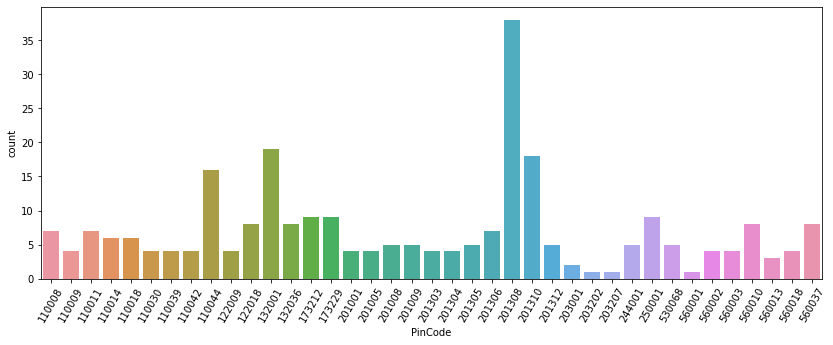

						 ShoppingSince 

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: ShoppingSince, dtype: int64


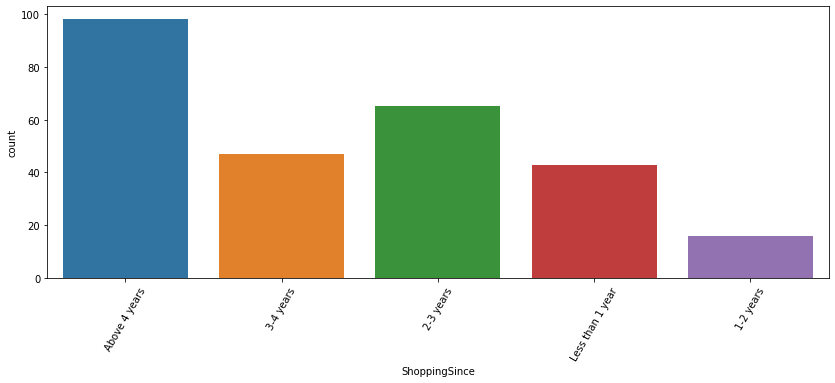

						 ShoppingFrequencySince_1year 

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: ShoppingFrequencySince_1year, dtype: int64


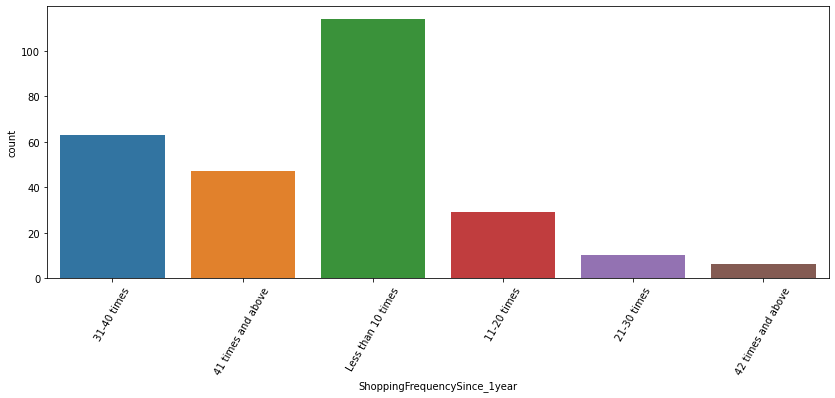

						 InternetAccessibility 

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: InternetAccessibility, dtype: int64


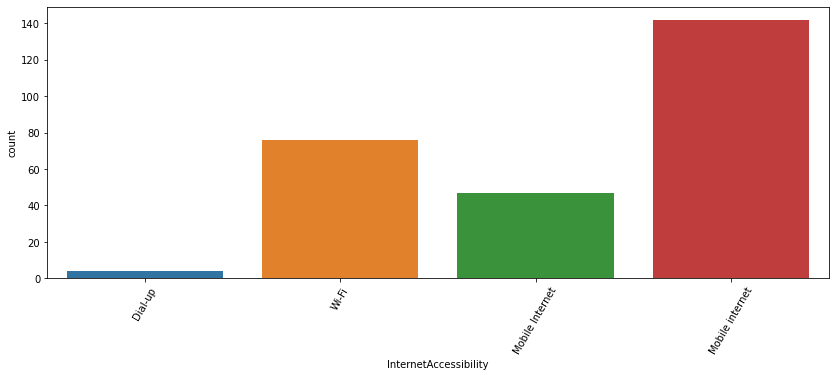

						 DeviceUsed 

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: DeviceUsed, dtype: int64


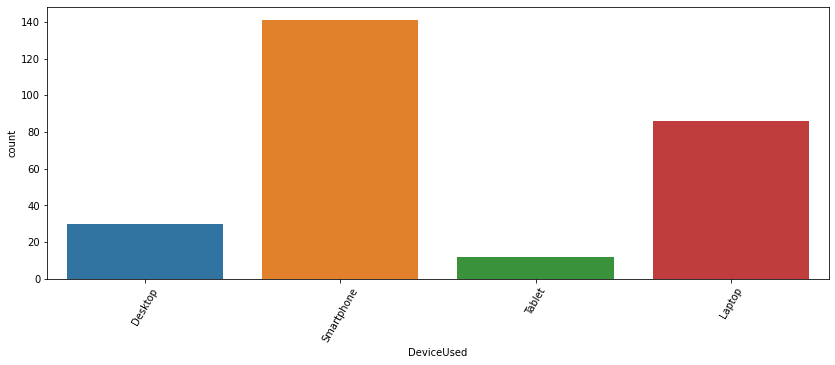

						 ScreenSize 

Others        134
5.5 inches     99
4.7 inches     29
5 inches        7
Name: ScreenSize, dtype: int64


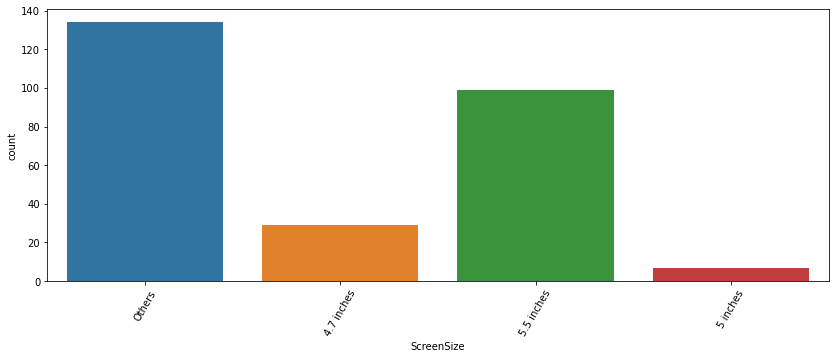

						 OS 

Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


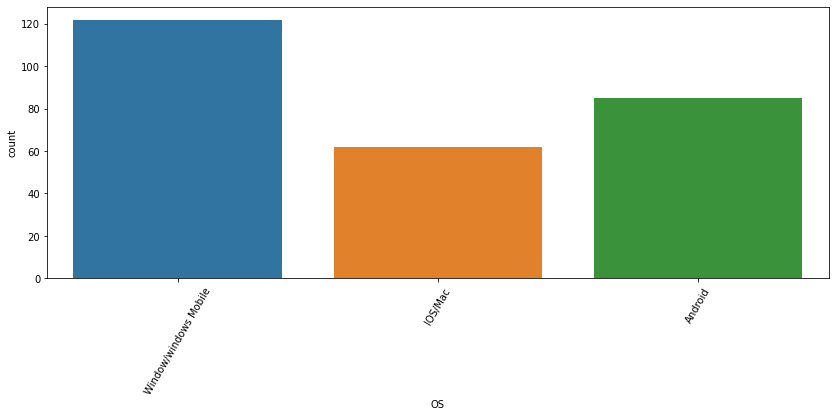

						 BrowserUsed 

Google chrome      216
Safari              40
Opera                8
Mozilla Firefox      5
Name: BrowserUsed, dtype: int64


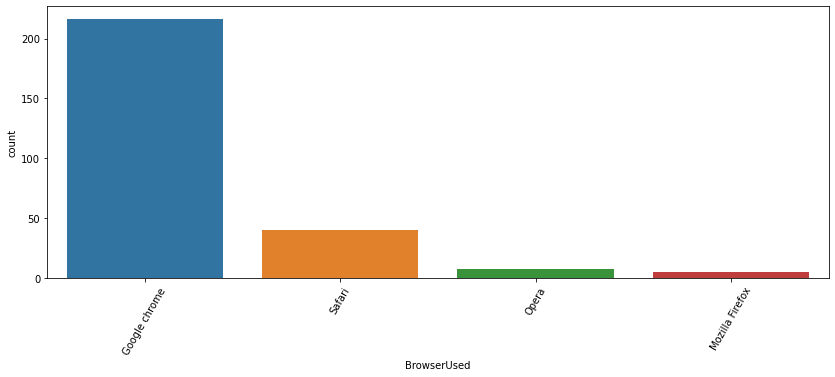

						 ChannelFirstUsed 

Search Engine        230
Content Marketing     20
Display Adverts       19
Name: ChannelFirstUsed, dtype: int64


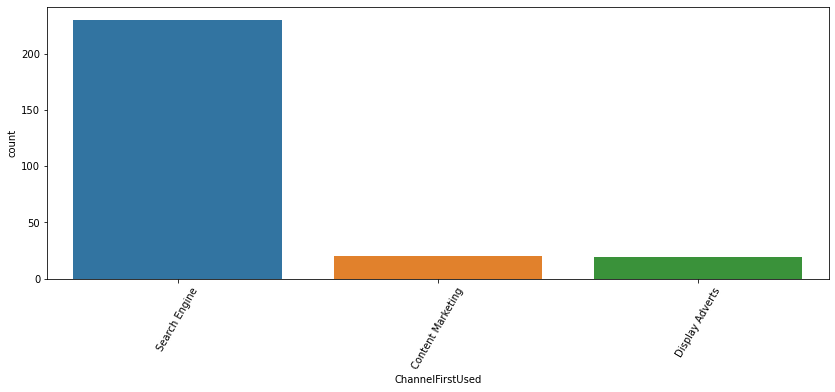

						 LoginMode 

Search Engine      87
Via application    86
Direct URL         70
E-mail             18
Social Media        8
Name: LoginMode, dtype: int64


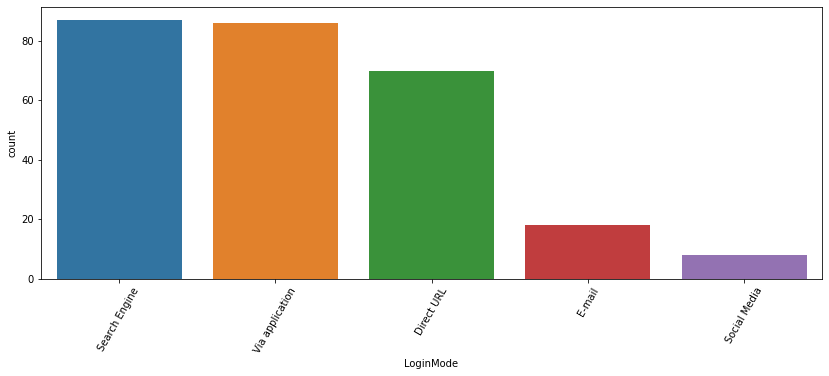

						 TimeSpentDeciding 

more than 15 mins    123
6-10 mins             71
11-15 mins            46
Less than 1 min       15
1-5 mins              14
Name: TimeSpentDeciding, dtype: int64


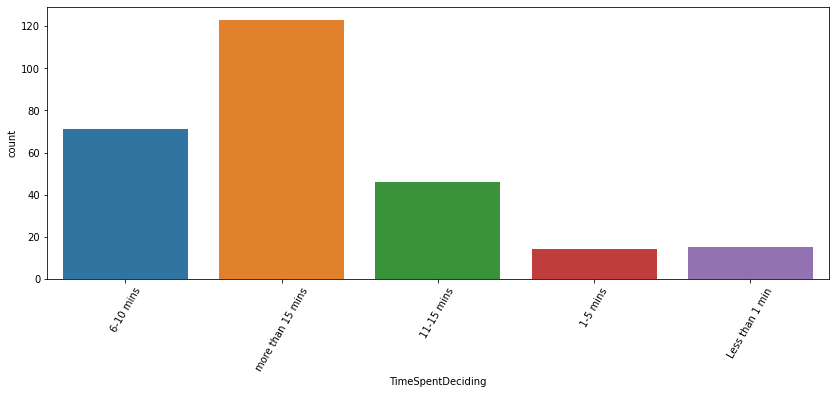

						 PaymentMode 

Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: PaymentMode, dtype: int64


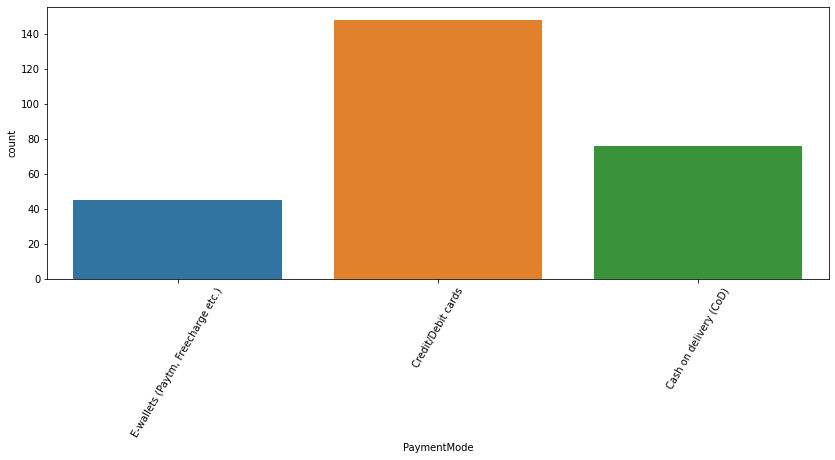

						 AbandonMakingPaymentFrequency 

Sometimes          171
Never               48
Frequently          35
Very frequently     15
Name: AbandonMakingPaymentFrequency, dtype: int64


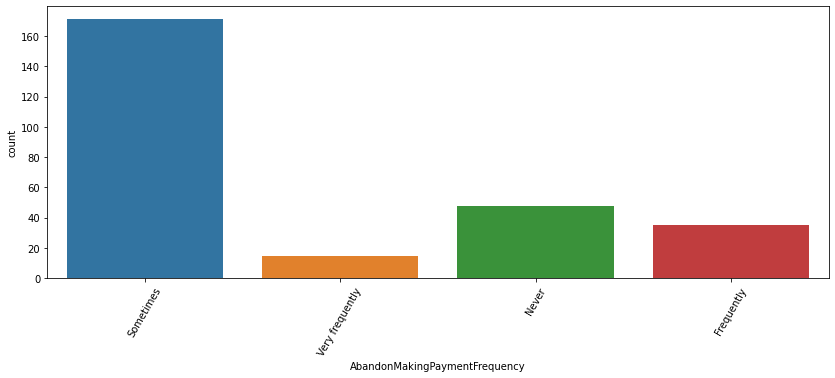

						 AbandonReason 

Better alternative offer        133
Promo code not applicable        54
Change in price                  37
Lack of trust                    31
No preferred mode of payment     14
Name: AbandonReason, dtype: int64


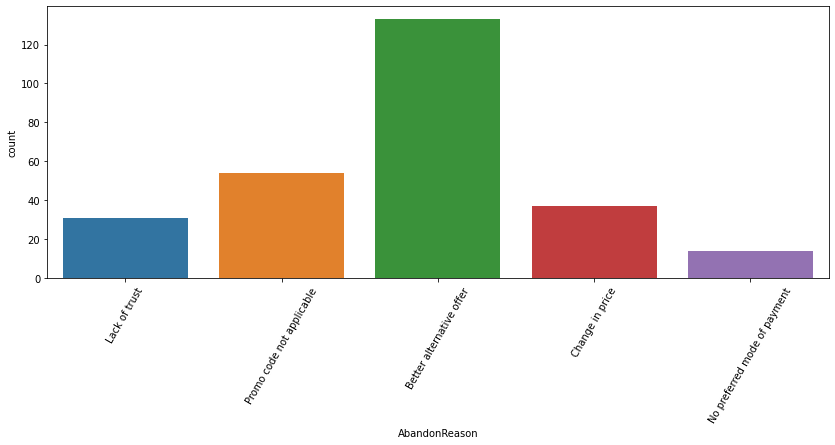

In [16]:
#Let's see the plot for all the categorical parameters

for col in categorical_columns:
    print('\t'*6,col, '\n')
    print(df[col].value_counts())
    plt.figure(figsize=(14,5))    
    sns.countplot(x=df[col])
    plt.xticks(rotation=60)    
    plt.show()

## Observation

* Out of the total, more than half customers are female
* Highest online shopping are done by the Age group of (31-40) years 
* "Delhi" contains highest number of participants then comes "Greater Noida", "Noida", "Bangalore" .Lowest are in "Bulandshahr"
* Highest number of participants are from this pin location: "201306" and rest location also contains more than 2 counts.
* Most of the Participants of the survey are shopping since 4 years/more  than 4 years
* More Participants had made purchases less than 10 times online but, count of (31-40)times purchases are not standing at least. Here, we can say that not all but almost half of the population have made purchases more than 10 times in the past 1 year
* Most of the participants use their Mobile internet to access products online/shop online
* Participants use their 5.5 inches of screensize to shop online largely, and here we can see that in our dataset contains most of the participants use any other screen size
* Most participants get "Better alternative offer" so, they abandon their shopping cart. And the second main reason to abandon is "Promo code not applicable". Then comes the reasons "Change in Price", "Lack of trust" and "No preferred mode of payment". Here, we can see that we also have a good number of participants who abandon due to "Lack of trust", hence. there is a need to get the trust from the participants

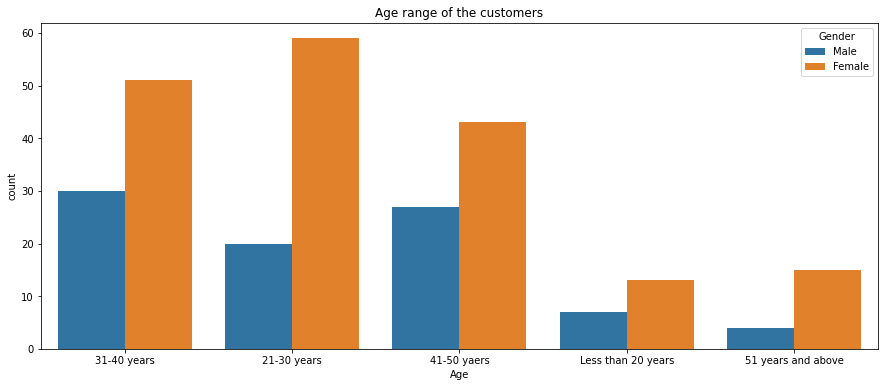

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Age'],hue = df['Gender'])
plt.title('Age range of the customers')
plt.show()

* Females numbers are most in 21-30 range .
* Males numbers are most in range 31-40.

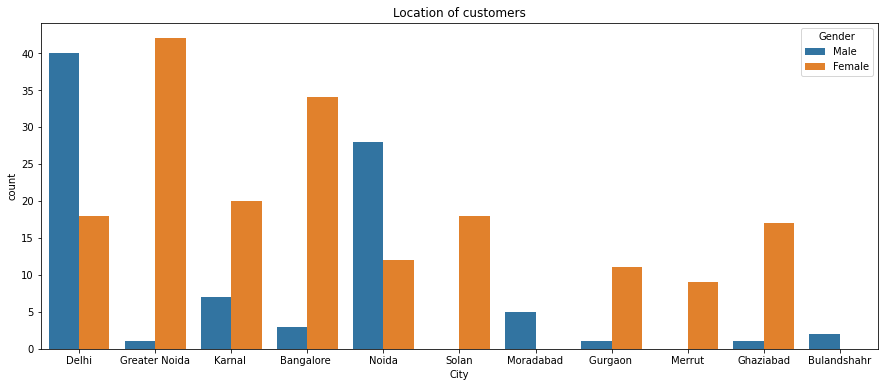

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['City'],hue = df['Gender'])
plt.title('Location of customers')
plt.show()

* In Delhi, Noida, Moradabad and Bulandshahr, we found that "Male shoppers" are more in number
* Other than that, high number of Female shoppers are almost everywhere

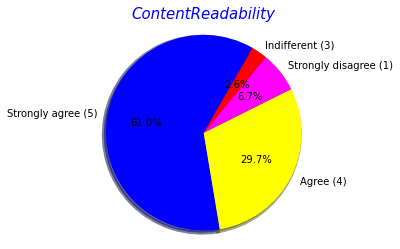

----------------------------------------------------------------------------------------------------




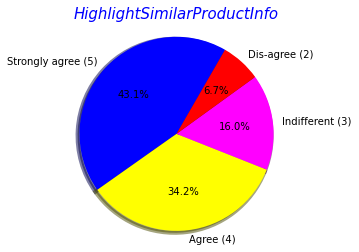

----------------------------------------------------------------------------------------------------




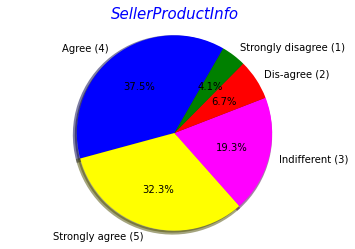

----------------------------------------------------------------------------------------------------




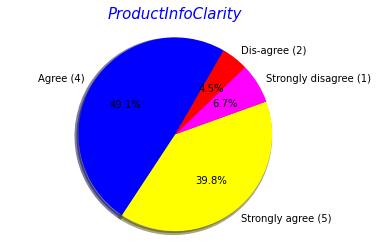

----------------------------------------------------------------------------------------------------




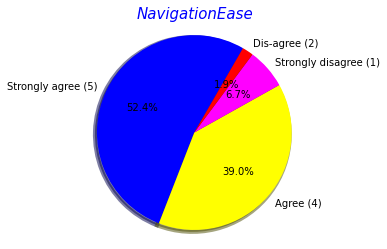

----------------------------------------------------------------------------------------------------




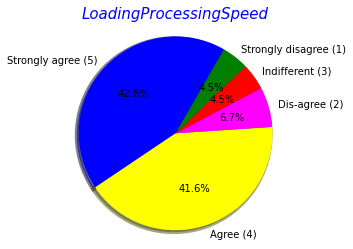

----------------------------------------------------------------------------------------------------




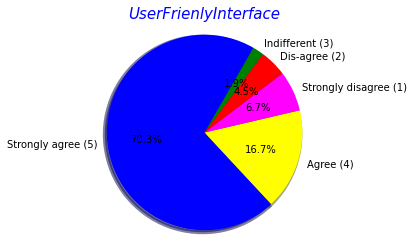

----------------------------------------------------------------------------------------------------




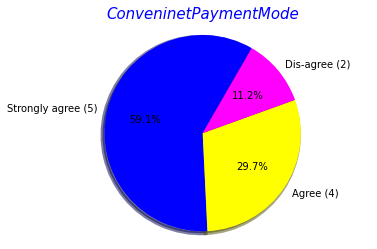

----------------------------------------------------------------------------------------------------




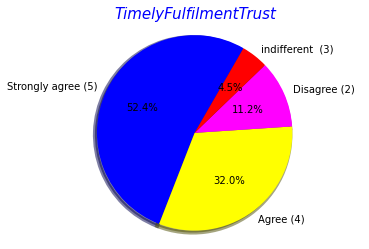

----------------------------------------------------------------------------------------------------




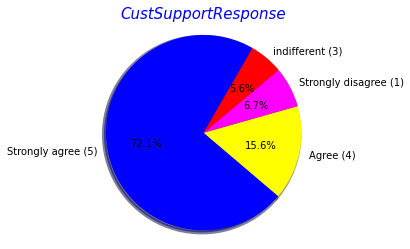

----------------------------------------------------------------------------------------------------




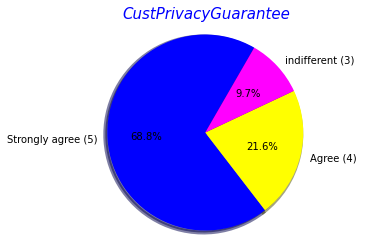

----------------------------------------------------------------------------------------------------




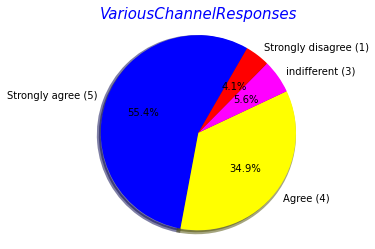

----------------------------------------------------------------------------------------------------




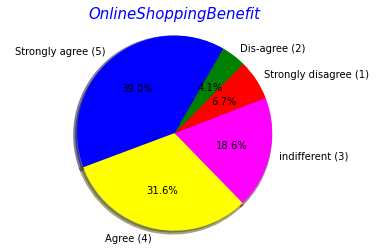

----------------------------------------------------------------------------------------------------




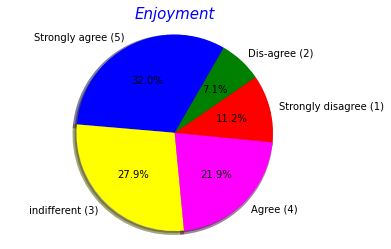

----------------------------------------------------------------------------------------------------




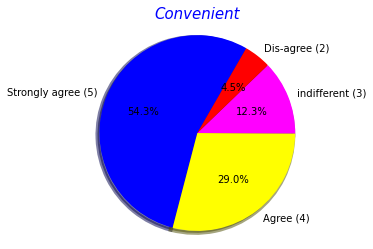

----------------------------------------------------------------------------------------------------




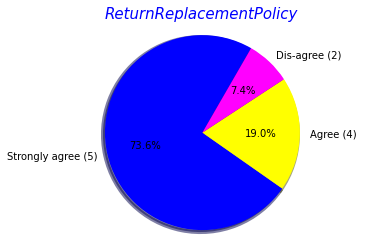

----------------------------------------------------------------------------------------------------




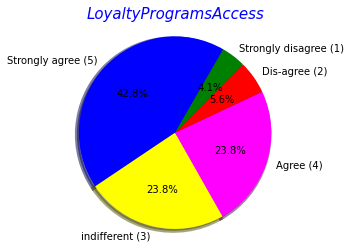

----------------------------------------------------------------------------------------------------




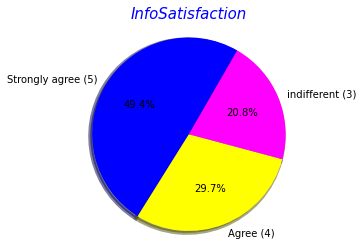

----------------------------------------------------------------------------------------------------




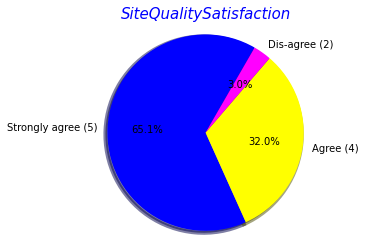

----------------------------------------------------------------------------------------------------




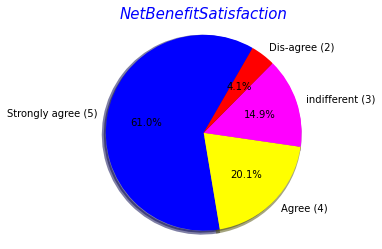

----------------------------------------------------------------------------------------------------




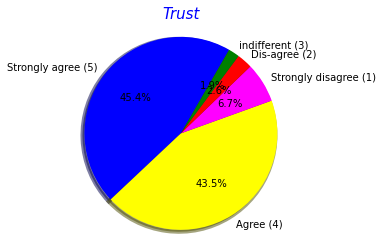

----------------------------------------------------------------------------------------------------




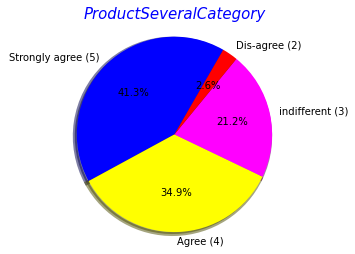

----------------------------------------------------------------------------------------------------




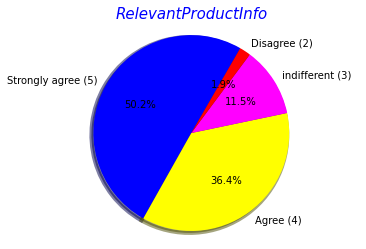

----------------------------------------------------------------------------------------------------




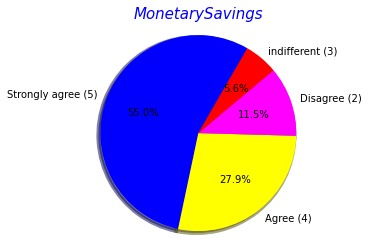

----------------------------------------------------------------------------------------------------




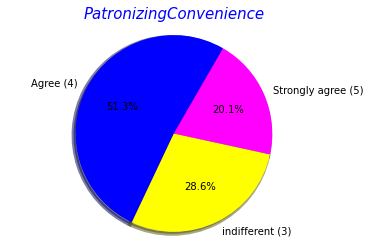

----------------------------------------------------------------------------------------------------




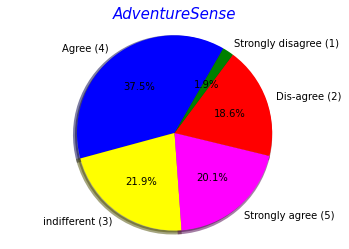

----------------------------------------------------------------------------------------------------




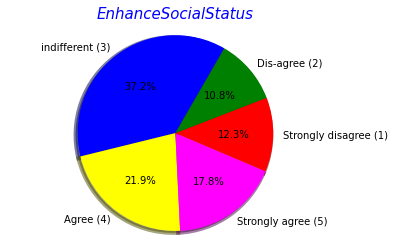

----------------------------------------------------------------------------------------------------




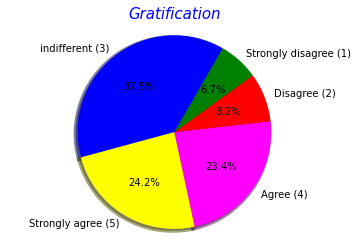

----------------------------------------------------------------------------------------------------




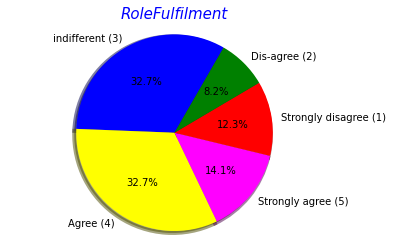

----------------------------------------------------------------------------------------------------




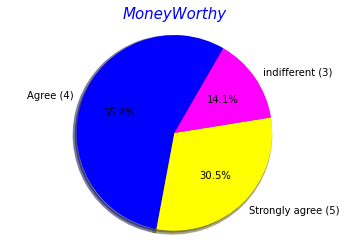

----------------------------------------------------------------------------------------------------




In [22]:
# Pie charts 

for i in rating_columns:
    plt.subplots()
    plt.pie(x=df[i].value_counts(), labels=df[i].value_counts().index,
            data=df, shadow=True, 
            startangle=60, autopct='%1.1f%%',
            colors=['blue', 'yellow','magenta','red', 'green', 'brown'],
            wedgeprops = {'linewidth': 4})
    plt.setp(plt.title(i,fontsize=15,color='darkred'),color='blue',style='italic')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
    print("----------"*10)
    print('\n')
    #break

    
#Let's also use the coded data for this part

coded_df = pd.read_excel('customer_retention_dataset.xlsx')
data = pd.read_excel('customer_retention_dataset.xlsx','datasheet')

rating_cols=df.iloc[:,17:47].columns
rating_cols=rating_cols.to_list()

ratings = {1: 'Strongly disagree', 2: 'Disagree', 3: 'Neither agree nor disagree', 4: 'Agree', 5: 'Strongly agree'} 


# Rename the values of the dataframe 
for col in rating_cols:
    coded_df.replace({col: ratings},inplace=True)

* Customers mostly believe that the content on the website must be easy to read and understand People agree that information on similar product to the one highlighted is important for product comparison 70% people believe that Complete information on listed seller and product is important for purchase decision. 

* 90% people believe that All relevant information on listed products must be stated clearly For more than 90% of the people believe that the following parameters are important:

* Ease of navigation in website Loading and processing speed User friendly Interface of the website Convenient Payment methods Trust that the online retail store will fulfill its part of the transaction at the stipulated time Empathy (readiness to assist with queries) towards the customers Being able to guarantee the privacy of the customer Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.) 

* Online shopping gives monetary benefit and discounts Getting value for money spent Around 70% people believe that Enjoyment is derived from shopping online 90% people believe that Shopping online is convenient and flexible more than 90% of the people believe that Return and replacement policy of the e-tailer is important for purchase decision most of the people believe that Gaining access to loyalty programs is a benefit of shopping online Observations based on Satisfaction: Around 20% people don't think that Displaying quality Information on the website improves satisfaction of customers. The other 80% agree that it is important. customers are in favour of "Strongly Agreement or Agree" : User derive satisfaction while shopping on a good quality website or application Net Benefit derived from shopping online can lead to users satisfaction User satisfaction cannot exist without trust Offering a wide variety of listed product in several category Provision of complete and relevant product information Monetary savings The Convenience of patronizing the online retailer People strongly believe: Shopping on the website gives you the sense of adventure, but we do have 10-30% who disagree Around 60-80 % people believe that: Shopping on your preferred e-tailer enhances your social status You feel gratification shopping on your favorite e-tailer Shopping on the website helps you fulfill certain roles

							 ShoppedFrom 

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                                       16
Amazon.in, Paytm.com                                            12
Amazon.in, Flipkart.com, Paytm.com                               7
Name: ShoppedFrom, dtype: int64


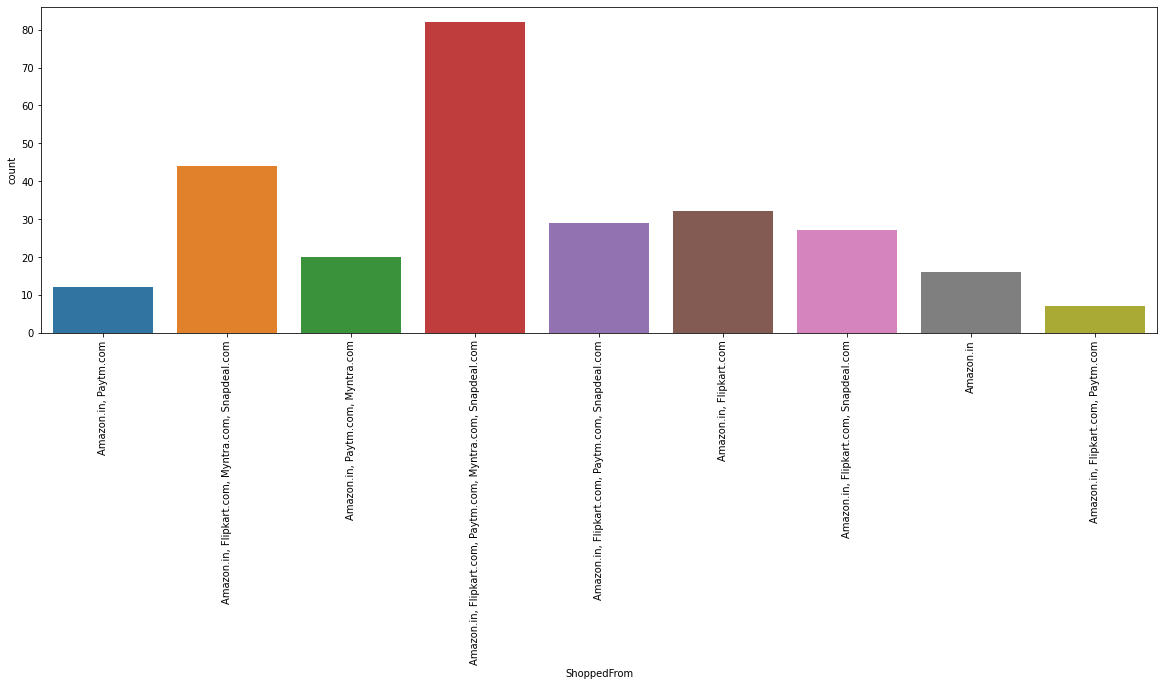

							 EasyWebApp 

Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    64
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         44
Amazon.in                                                       29
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                22
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Flipkart.com, Myntra.com                             19
Paytm.com                                                       12
Flipkart.com                                                     8
Amazon.in, Paytm.com                                             7
Name: EasyWebApp, dtype: int64


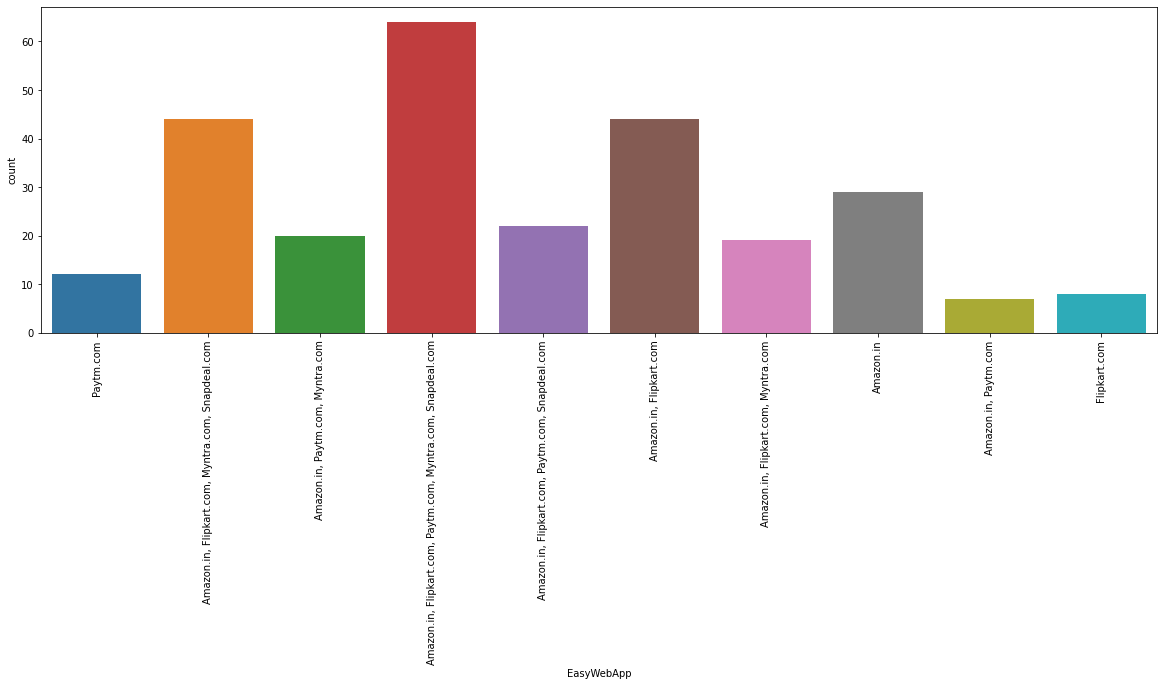

							 VisuallyAppealingWebApp 

Amazon.in, Flipkart.com                                         87
Amazon.in                                                       44
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    36
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Myntra.com                                           15
Flipkart.com, Myntra.com                                        15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Flipkart.com                                                    12
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                11
Name: VisuallyAppealingWebApp, dtype: int64


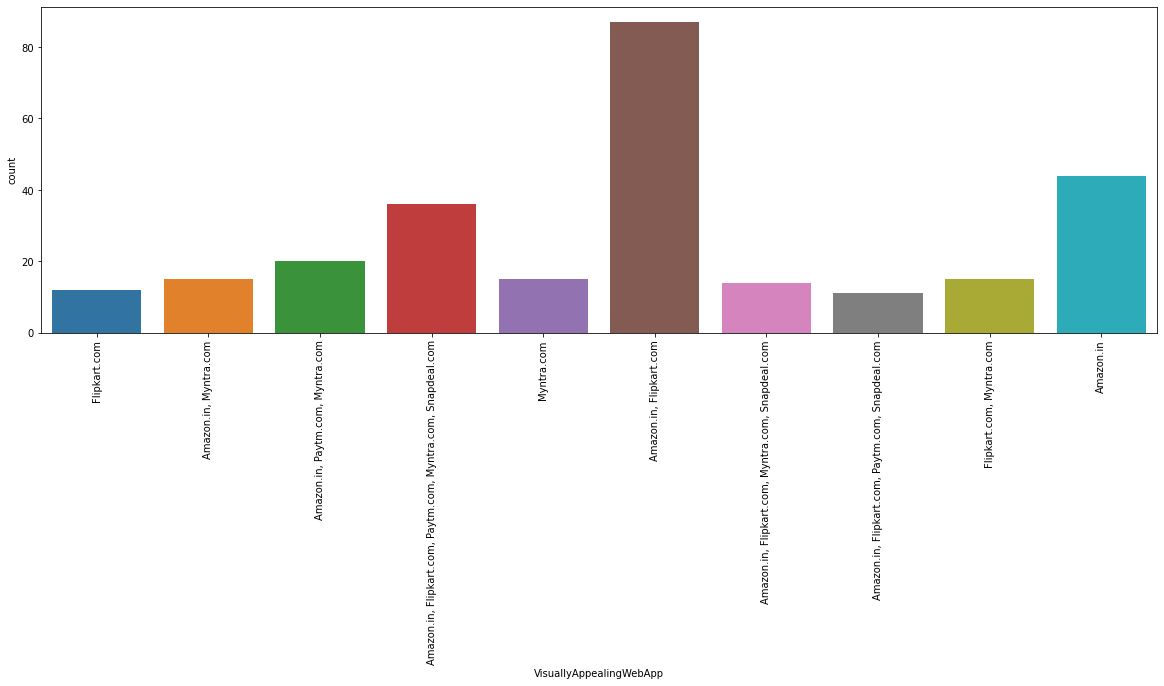

							 ProductVariety 

Amazon.in, Flipkart.com                              130
Amazon.in                                             43
Amazon.in, Myntra.com                                 20
Flipkart.com, Myntra.com                              15
Myntra.com                                            15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com     14
Amazon.in, Flipkart.com, Paytm.com                    13
Flipkart.com                                          12
Paytm.com                                              7
Name: ProductVariety, dtype: int64


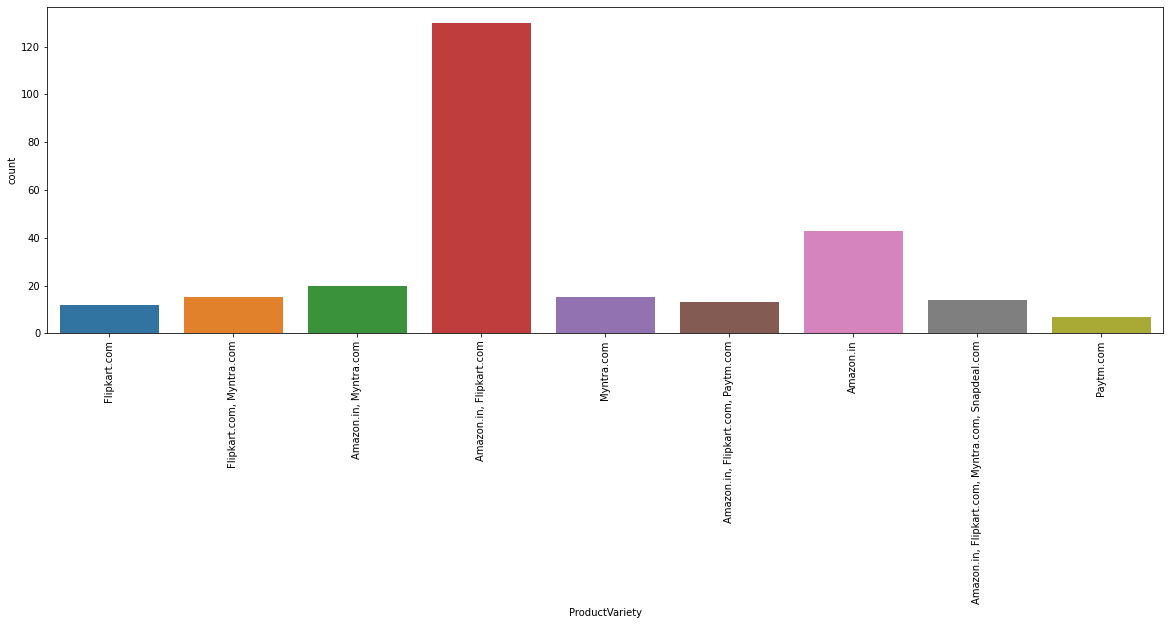

							 CompleteProductInfo 

Amazon.in, Flipkart.com                                         100
Amazon.in                                                        43
Amazon.in, Flipkart.com, Paytm.com                               24
Amazon.in, Paytm.com, Myntra.com                                 20
Amazon.in, Flipkart.com, Myntra.com                              15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com     15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com                14
Snapdeal.com                                                     12
Flipkart.com, Snapdeal.com                                       11
Flipkart.com                                                      8
Amazon.in, Flipkart.com, Snapdeal.com                             7
Name: CompleteProductInfo, dtype: int64


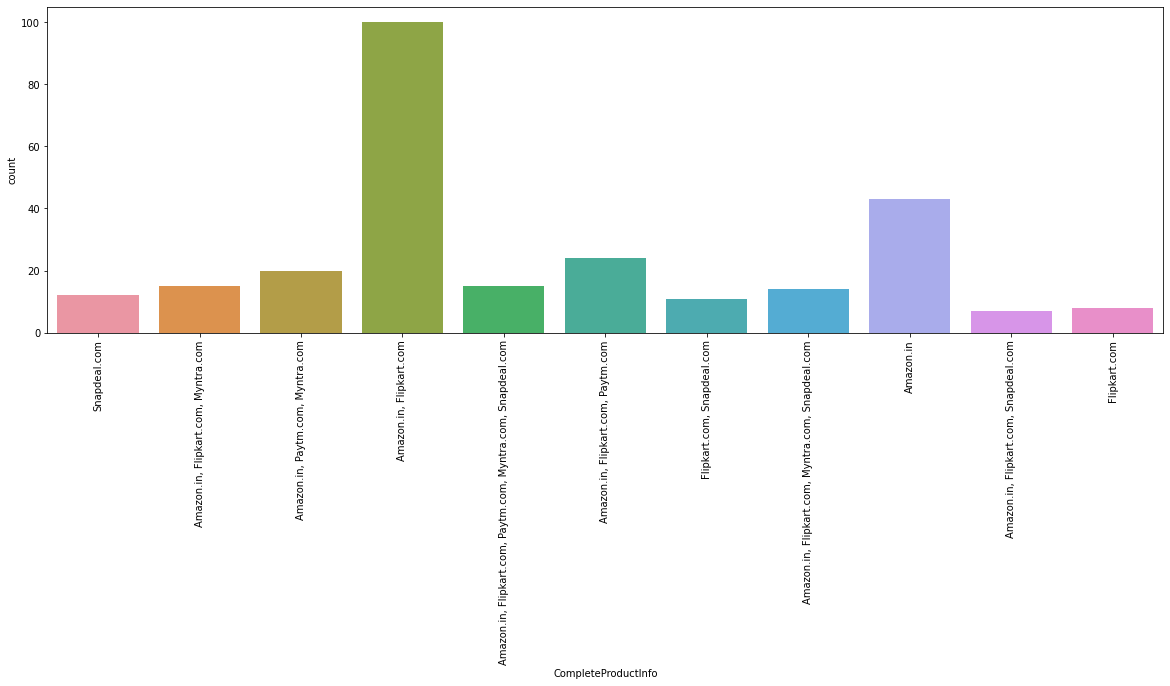

							 FastWebApp 

Amazon.in                                                       51
Amazon.in, Paytm.com                                            44
Amazon.in, Flipkart.com, Myntra.com                             30
Amazon.in, Flipkart.com                                         30
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    30
Amazon.in, Flipkart.com, Paytm.com                              25
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Snapdeal.com                                                    12
Flipkart.com                                                     8
Name: FastWebApp, dtype: int64


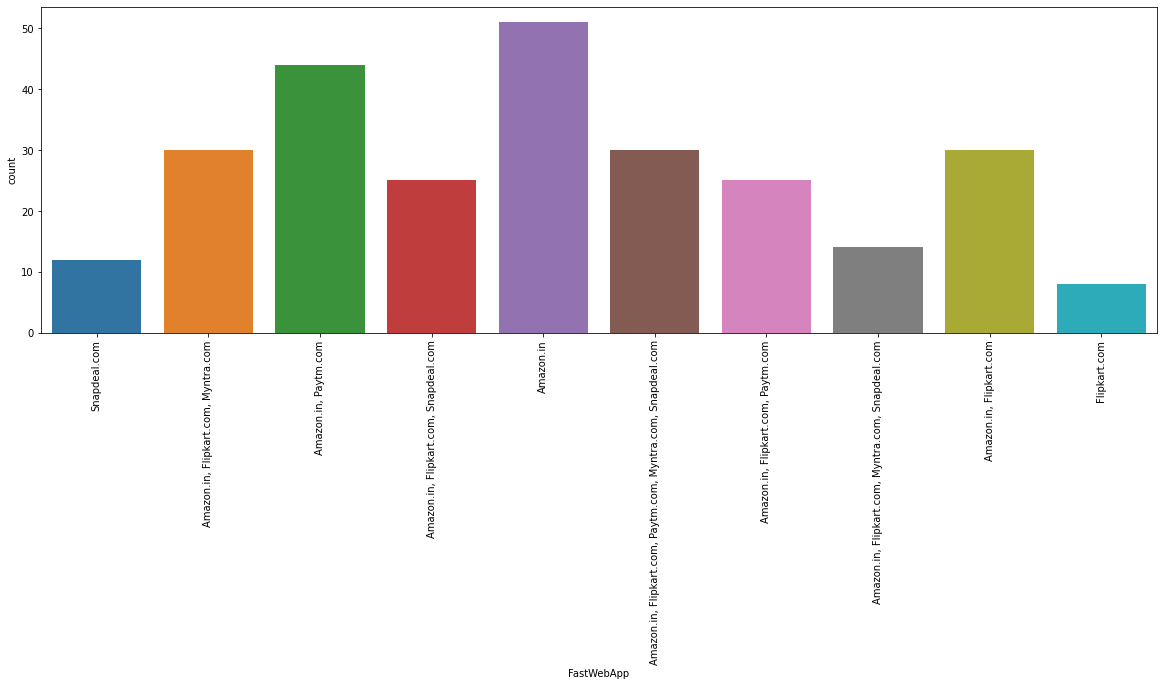

							 ReliableWebApp 

Amazon.in                                            61
Amazon.in, Flipkart.com                              50
Amazon.in, Flipkart.com, Paytm.com                   36
Amazon.in, Paytm.com, Myntra.com                     35
Amazon.in, Flipkart.com, Snapdeal.com                18
Flipkart.com                                         15
Myntra.com                                           15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com    14
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com     13
Paytm.com                                            12
Name: ReliableWebApp, dtype: int64


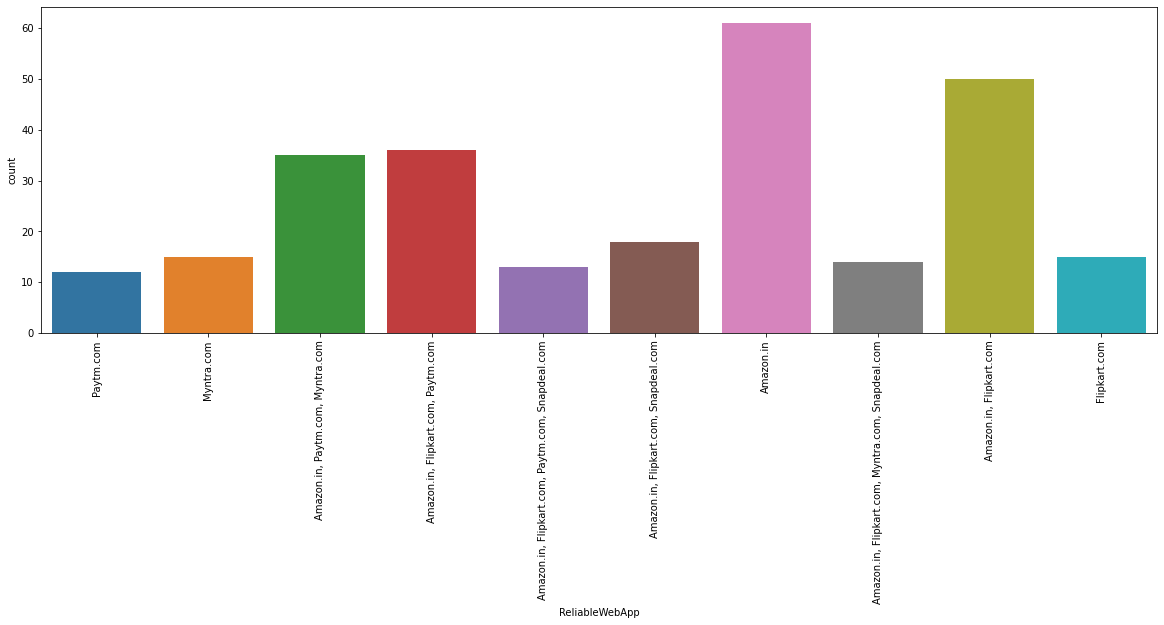

							 QuickPurchase 

Amazon.com                                                   66
Amazon.com, Flipkart.com, Paytm.com                          47
Amazon.com, Flipkart.com                                     37
Amazon.com, Flipkart.com, Myntra.com                         30
Paytm.com                                                    25
Amazon.com, Paytm.com, Myntra.com                            20
Flipkart.com                                                 15
Amazon.com, Flipkart.com, Paytm.com, Myntra.com, Snapdeal    15
Flipkart.com, Myntra.com, Snapdeal                           14
Name: QuickPurchase, dtype: int64


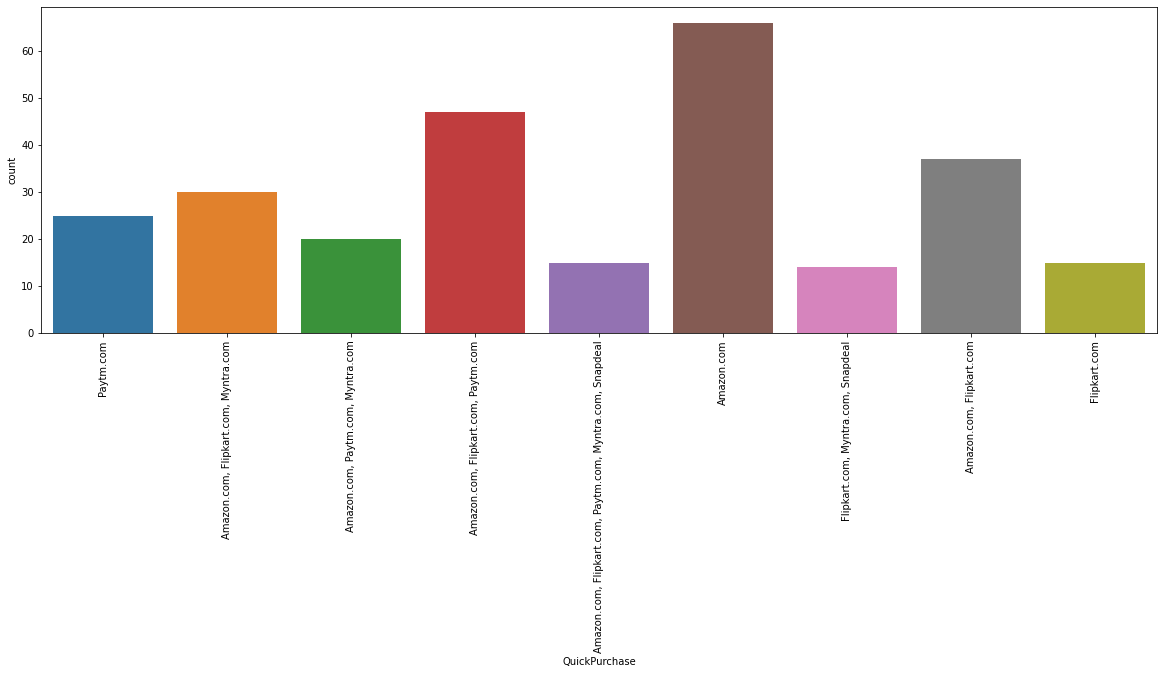

							 PaymentOptionsAvailability 

Amazon.in, Flipkart.com                                         65
Amazon.in, Flipkart.com, Myntra.com                             40
Amazon.in, Flipkart.com, Patym.com, Myntra.com, Snapdeal.com    39
Amazon.in                                                       23
Patym.com, Myntra.com                                           20
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               19
Amazon.in, Flipkart.com, Snapdeal.com                           18
Flipkart.com, Myntra.com, Snapdeal.com                          14
Patym.com                                                       12
Amazon.in, Patym.com                                            11
Flipkart.com                                                     8
Name: PaymentOptionsAvailability, dtype: int64


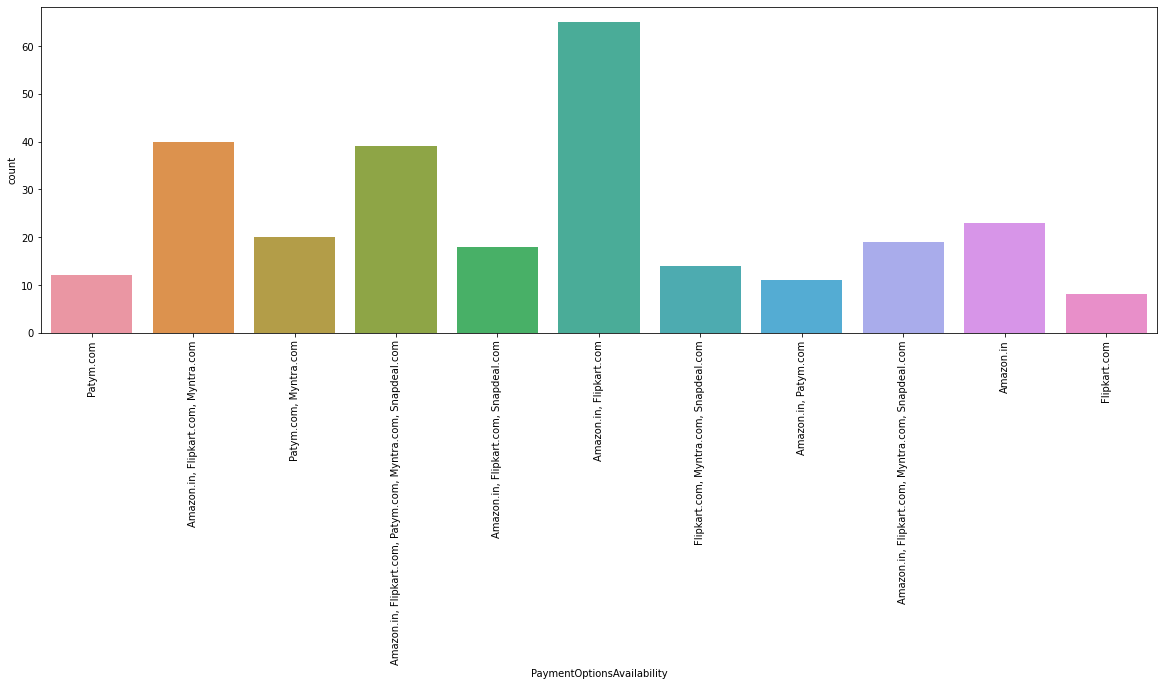

							 SpeedyDelivery 

Amazon.in                                 107
Amazon.in, Flipkart.com                    82
Amazon.in, Flipkart.com, Snapdeal.com      36
Amazon.in, Flipkart.com, Myntra.com        15
Flipkart.com                               15
Flipkart.com, Myntra.com, Snapdeal.com     14
Name: SpeedyDelivery, dtype: int64


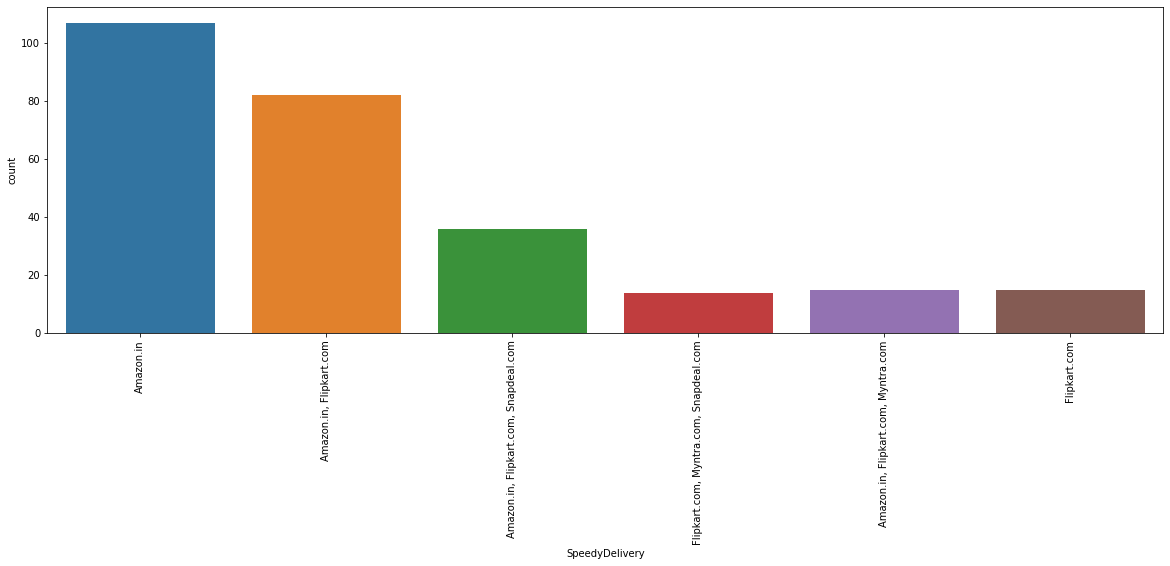

							 CustInfoPrivacy 

Amazon.in                                                       71
Amazon.in, Flipkart.com                                         54
Amazon.in, Flipkart.com, Myntra.com                             25
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    24
Paytm.com                                                       18
Flipkart.com                                                    15
Amazon.in, Paytm.com                                            15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Amazon.in, Flipkart.com, Snapdeal.com                            7
Name: CustInfoPrivacy, dtype: int64


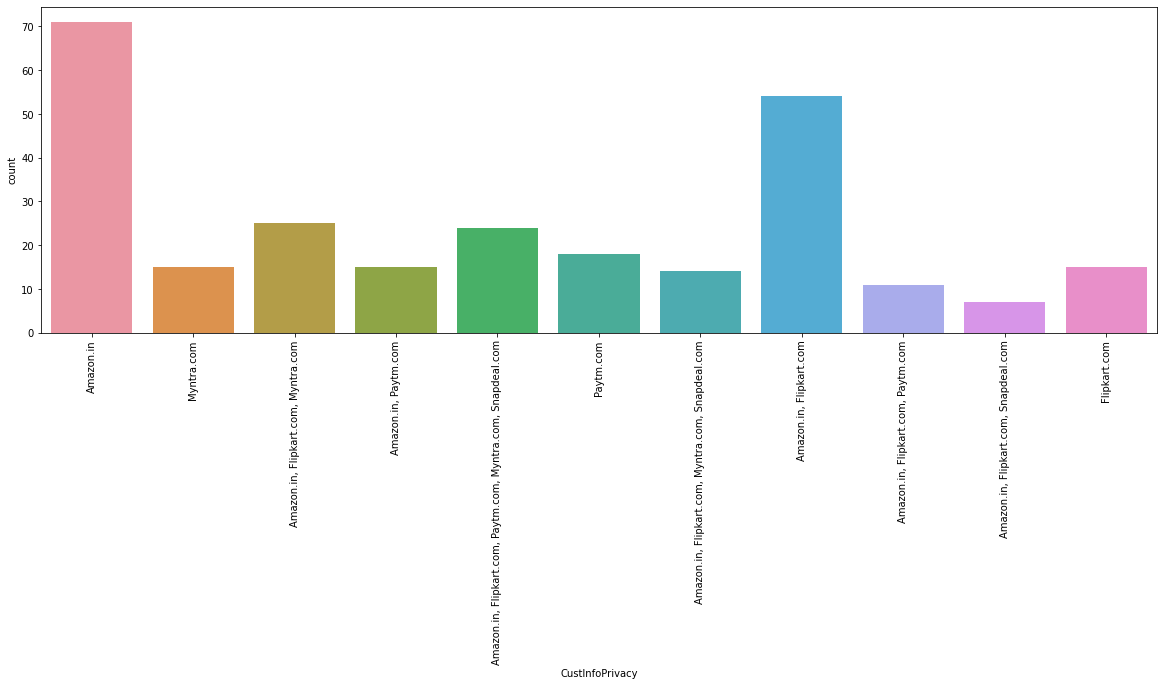

							 Financial_InfoSecurity 

Amazon.in                                                       51
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    42
Flipkart.com                                                    33
Amazon.in, Flipkart.com, Snapdeal.com                           25
Amazon.in, Flipkart.com                                         24
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in, Snapdeal.com                                         19
Paytm.com                                                       15
Myntra.com                                                      15
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               14
Amazon.in, Flipkart.com, Paytm.com                              11
Name: Financial_InfoSecurity, dtype: int64


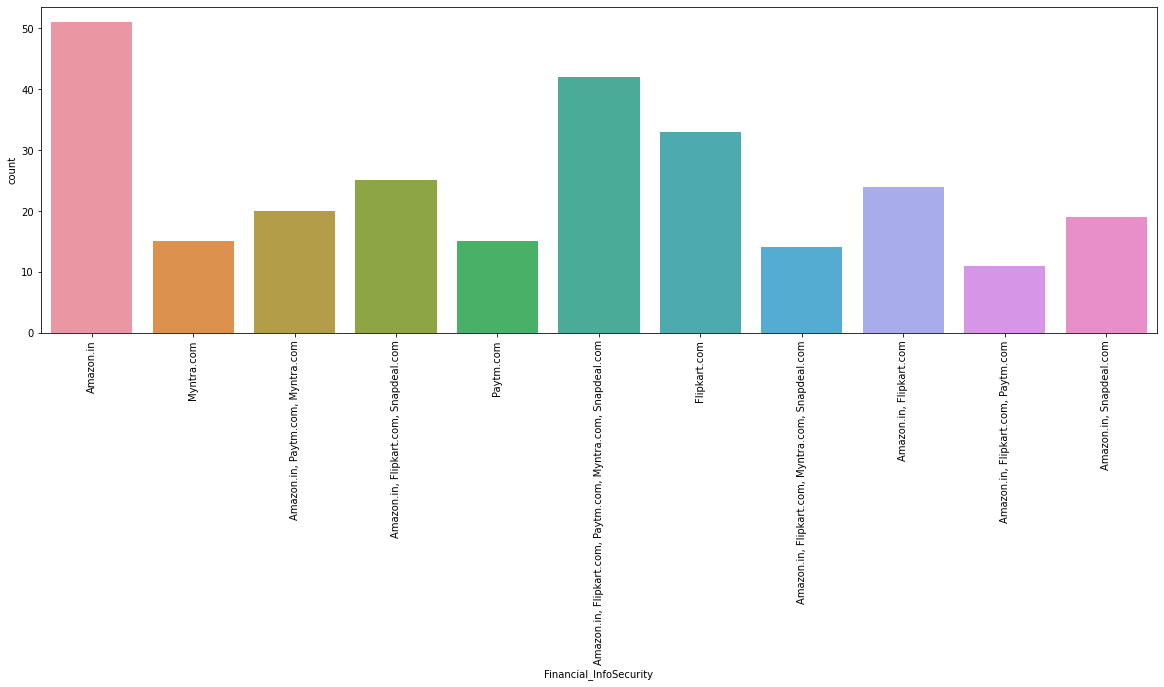

							 PerceivedTrustworthiness 

Amazon.in                                                       76
Amazon.in, Flipkart.com, Snapdeal.com                           36
Amazon.in, Myntra.com                                           35
Amazon.in, Flipkart.com                                         31
Flipkart.com                                                    27
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               25
Myntra.com                                                      15
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    13
Amazon.in, Flipkart.com, Paytm.com                              11
Name: PerceivedTrustworthiness, dtype: int64


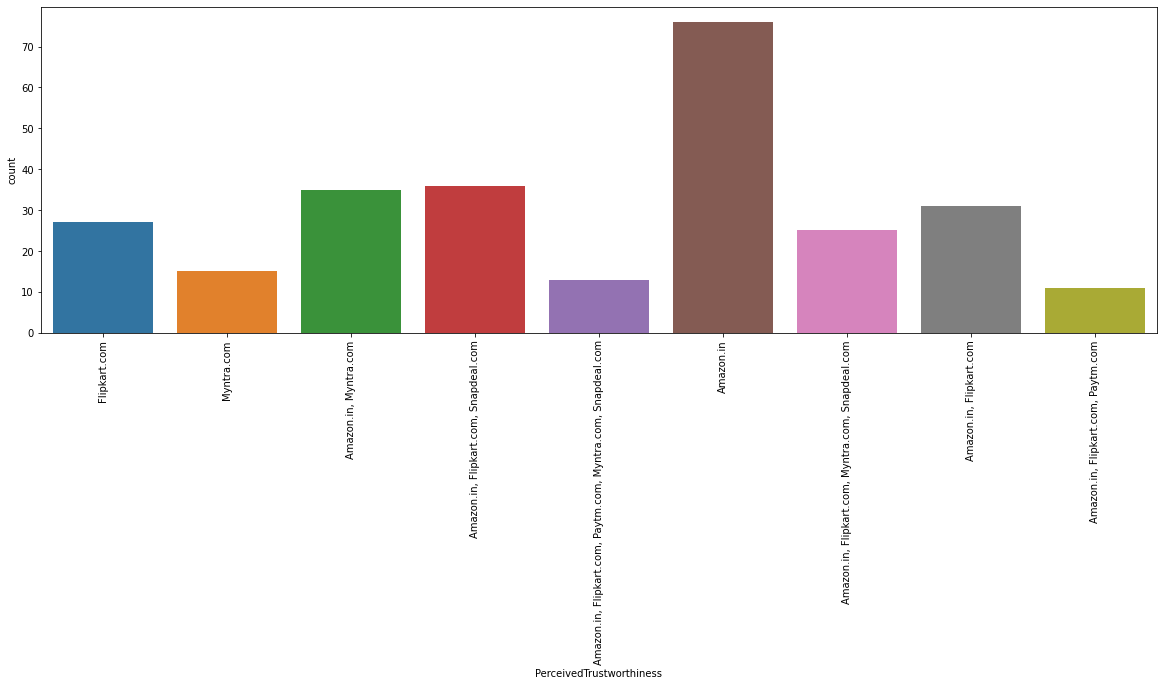

							 MultiChannelAssistance 

Amazon.in, Flipkart.com, Myntra.com, Snapdeal    61
Amazon.in                                        60
Amazon.in, Flipkart.com                          39
Amazon.in, Snapdeal                              26
Myntra.com                                       20
Amazon.in, Myntra.com                            15
Amazon.in, Flipkart.com, Myntra.com              15
Amazon.in, Flipkart.com, Paytm.com               13
Paytm.com                                        12
Flipkart.com                                      8
Name: MultiChannelAssistance, dtype: int64


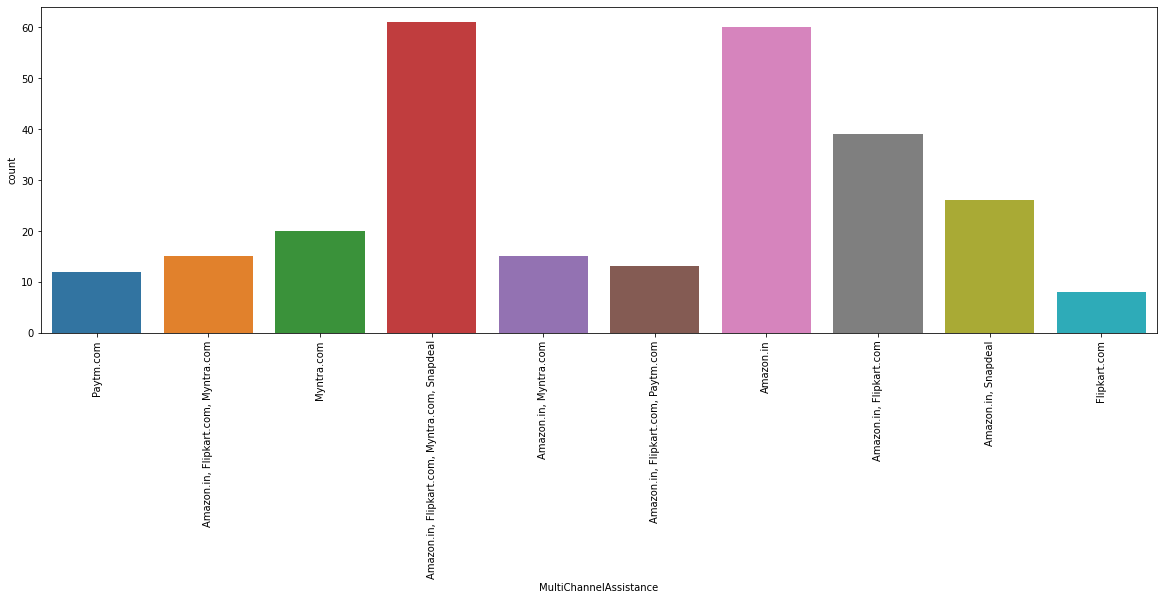

							 LongLoginTime 

Amazon.in                                57
Amazon.in, Flipkart.com                  38
Paytm.com                                38
Myntra.com                               35
Amazon.in, Flipkart.com, Snapdeal.com    29
Snapdeal.com                             25
Flipkart.com, Paytm.com                  15
Flipkart.com, Paytm.com, Snapdeal.com    13
Amazon.in, Paytm.com                     11
Flipkart.com                              8
Name: LongLoginTime, dtype: int64


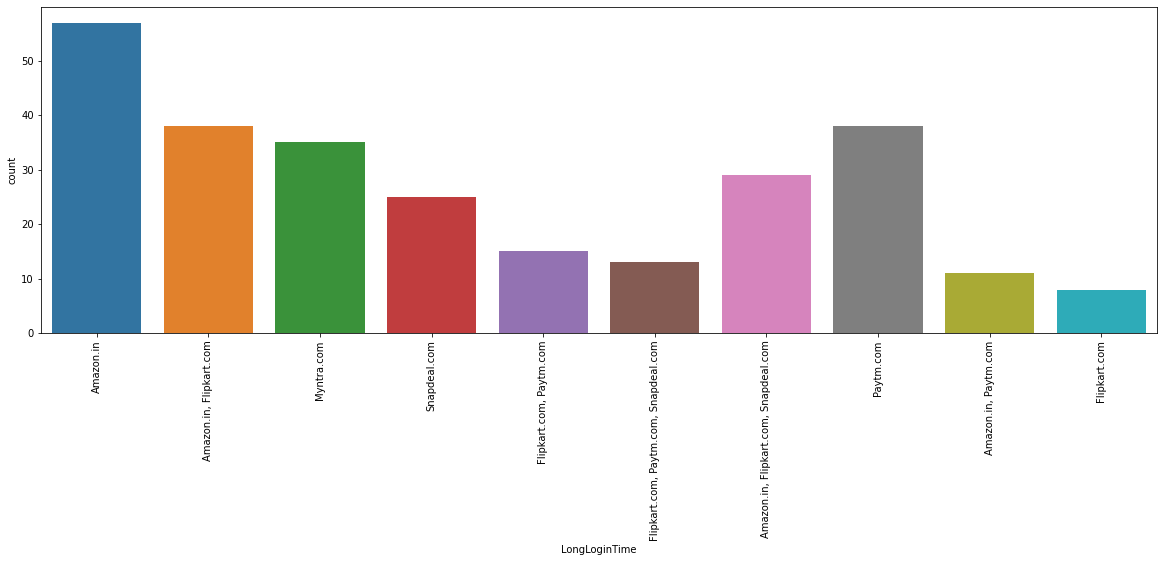

							 LongDisplayTime 

Amazon.in, Flipkart.com                60
Amazon.in                              39
Myntra.com                             35
Snapdeal.com                           34
Myntra.com, Snapdeal.com               25
Flipkart.com, Snapdeal.com             19
Flipkart.com                           15
Paytm.com                              15
Amazon.in, Myntra.com, Snapdeal.com    14
Amazon.in, Paytm.com                   13
Name: LongDisplayTime, dtype: int64


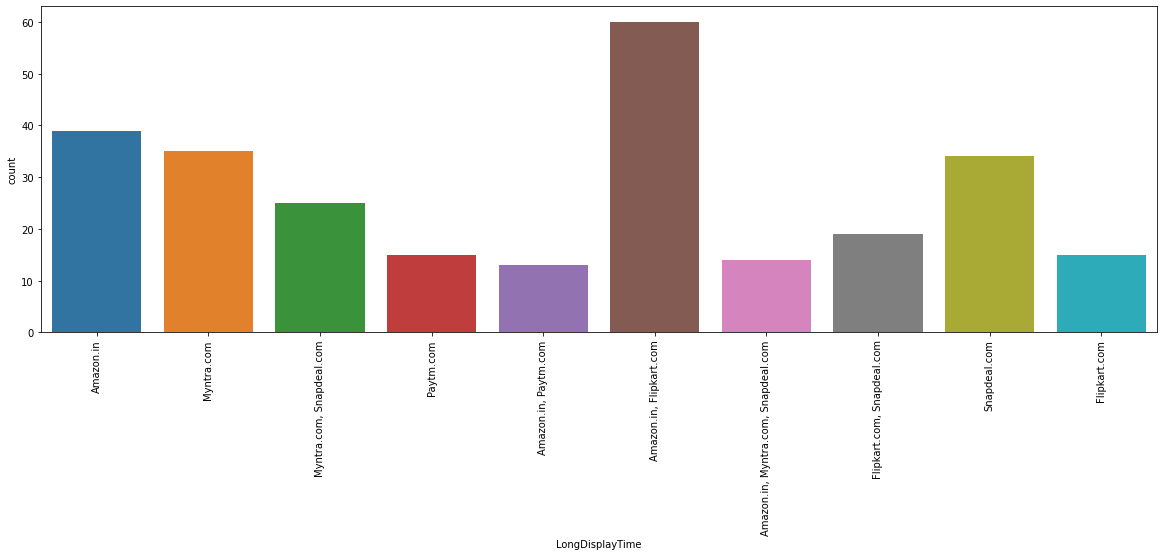

							 LatePriceDeclare 

Myntra.com                 75
Paytm.com                  52
snapdeal.com               41
Amazon.in                  38
Flipkart.com               38
Amazon.in, Paytm.com       13
Paytm.com, snapdeal.com     7
Amazon.in, Flipkart.com     5
Name: LatePriceDeclare, dtype: int64


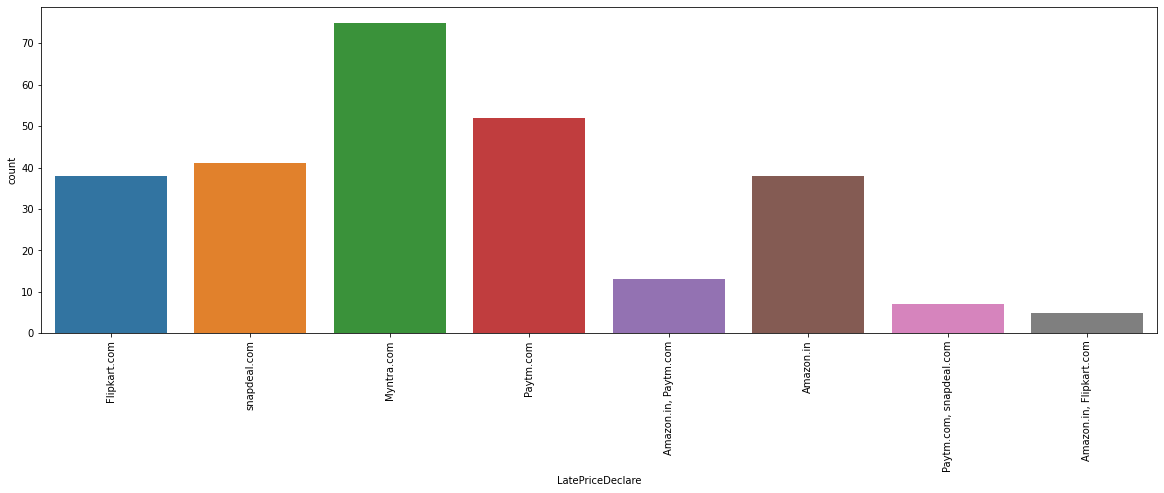

							 LongLoadingTime 

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: LongLoadingTime, dtype: int64


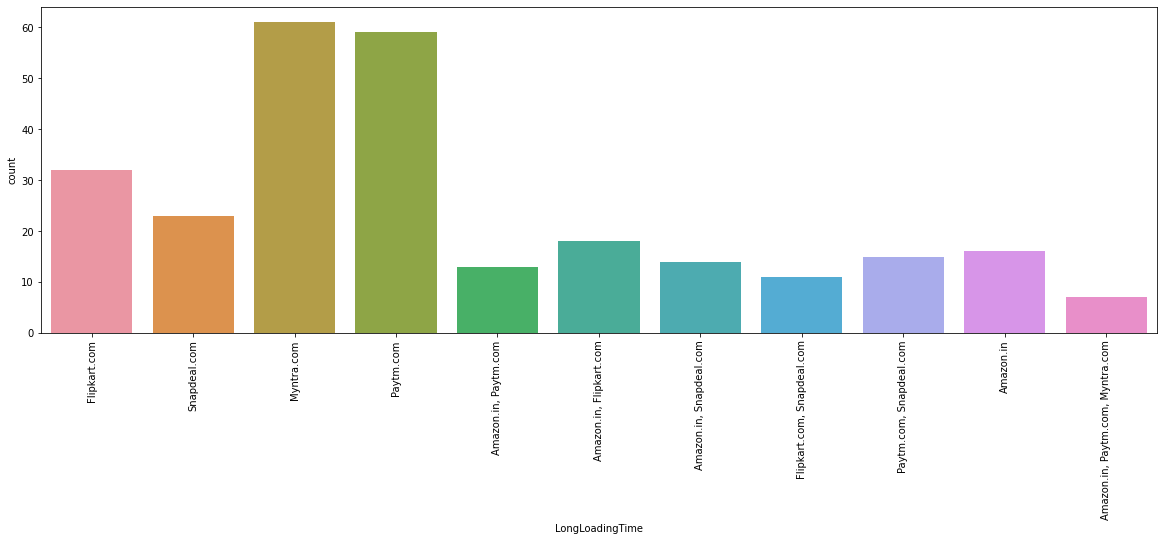

							 LimitedPaymentMode 

Snapdeal.com                87
Amazon.in                   62
Flipkart.com                31
Amazon.in, Flipkart.com     29
Paytm.com                   25
Paytm.com, Snapdeal.com     15
Amazon.in, Paytm.com        13
Myntra.com, Snapdeal.com     7
Name: LimitedPaymentMode, dtype: int64


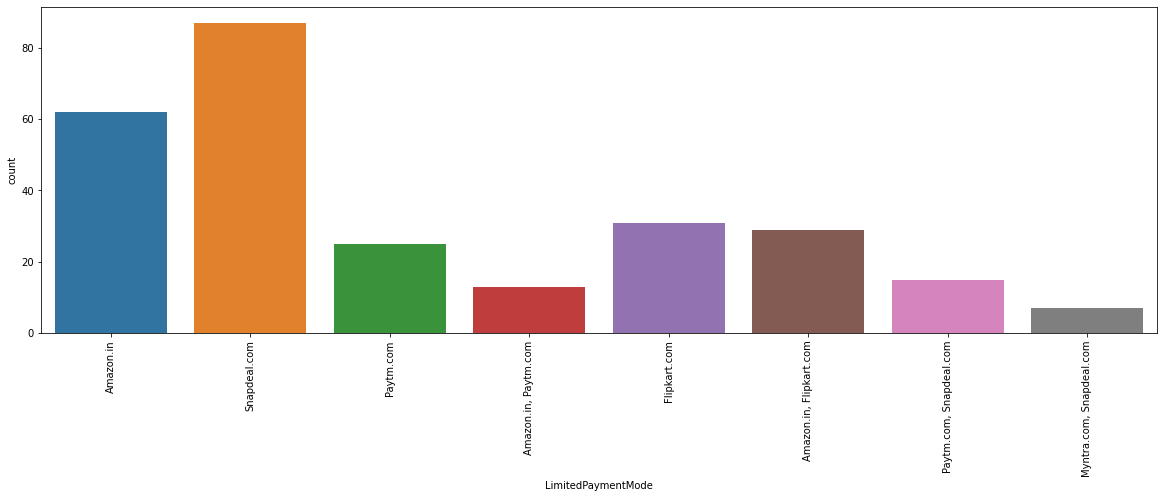

							 LongerDeliveryPeriod 

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: LongerDeliveryPeriod, dtype: int64


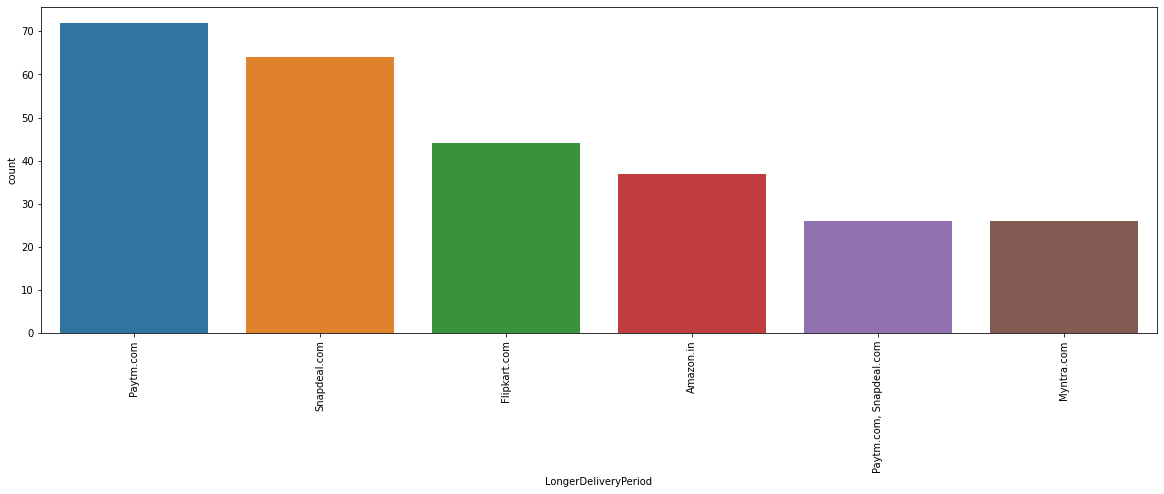

							 WebAppDesignChange 

Amazon.in                   96
Paytm.com                   63
Amazon.in, Flipkart.com     45
Myntra.com                  30
Flipkart.com                20
Snapdeal.com                 8
Flipkart.com, Myntra.com     7
Name: WebAppDesignChange, dtype: int64


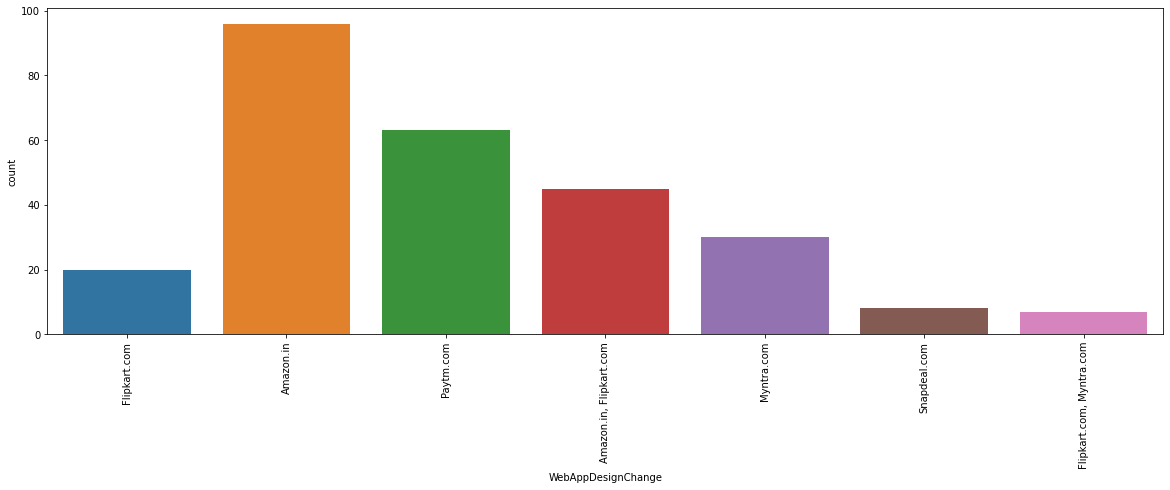

							 FrequentPageDisruption 

Amazon.in                     53
Myntra.com                    52
Snapdeal.com                  49
Paytm.com                     39
Flipkart.com                  26
Amazon.in, Flipkart.com       25
Myntra.com, Snapdeal.com      14
Flipkart.com, Snapdeal.com    11
Name: FrequentPageDisruption, dtype: int64


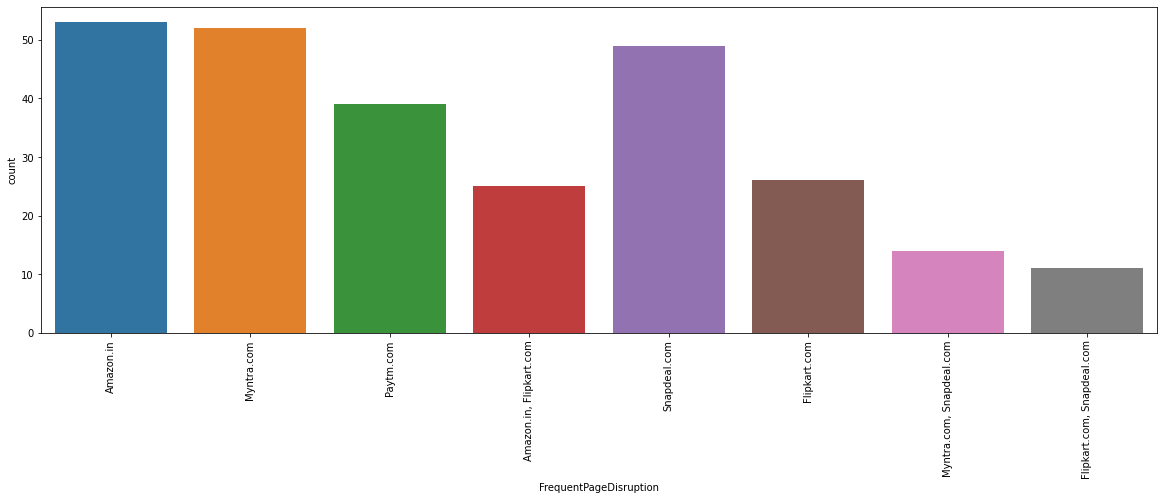

							 WebAppEfficiency 

Amazon.in                             94
Flipkart.com                          47
Amazon.in, Flipkart.com               45
Amazon.in, Flipkart.com, Paytm.com    25
Amazon.in, Paytm.com                  18
Paytm.com                             15
Myntra.com, Snapdeal.com              14
Snapdeal.com                          11
Name: WebAppEfficiency, dtype: int64


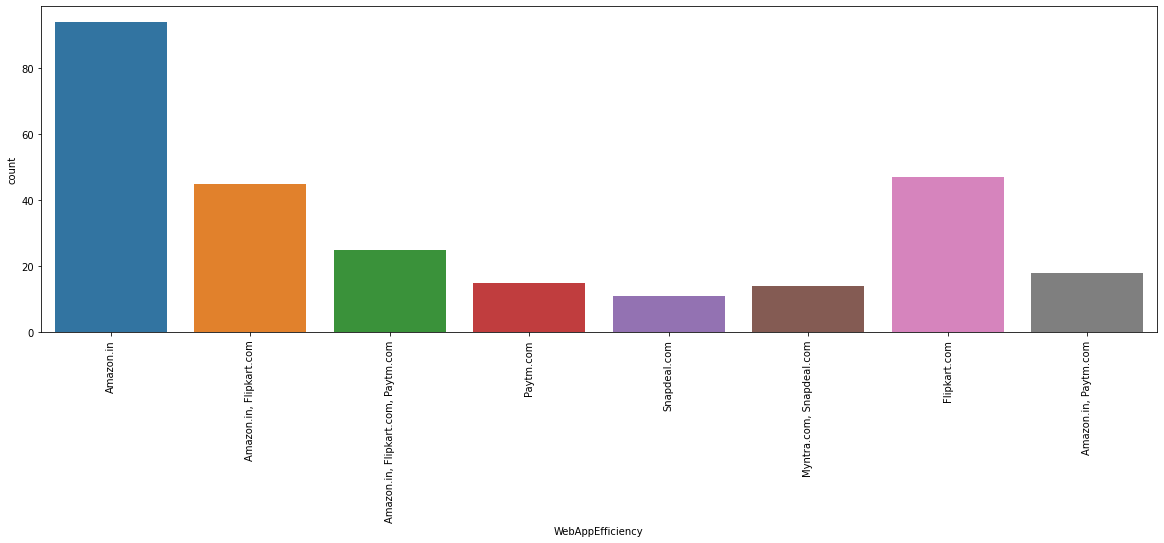

							 Recommendation 

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Recommendation, dtype: int64


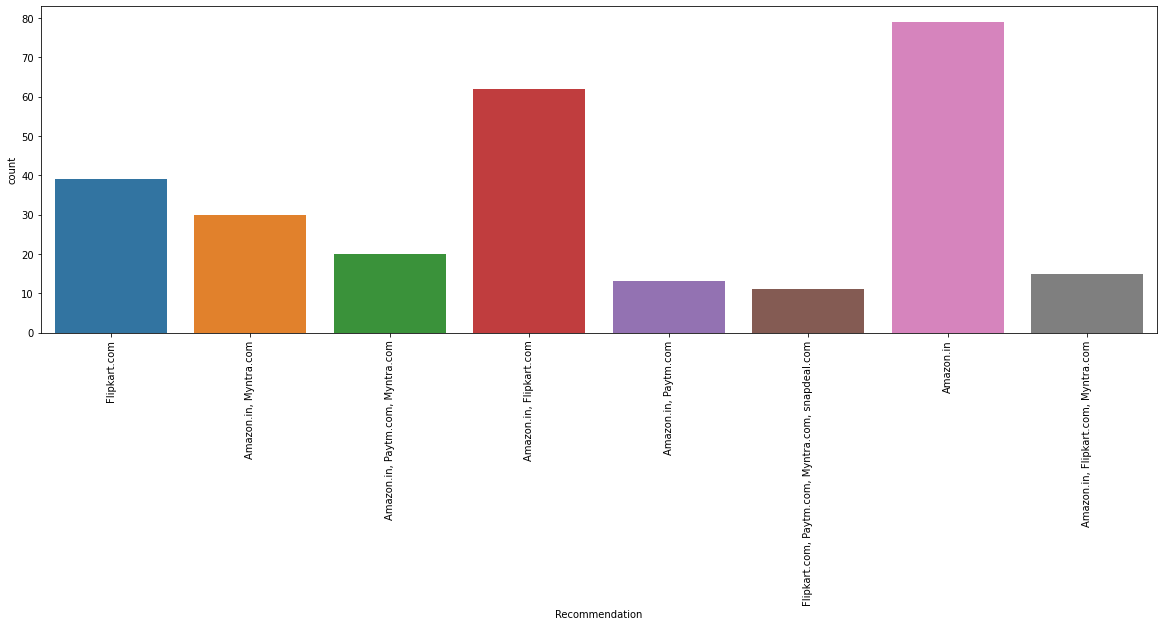

In [23]:
for col in ecommerce_columns:
    print('\t'*7,col,'\n')
    print(df[col].value_counts())
    plt.figure(figsize=(20,6))
    sns.countplot(x=df[col])
    plt.xticks(rotation=90)
    plt.show()
    

## Observations:

* Most Participants have shopped from these 5 companies - "Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com".
* Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com Also, Amazon.com and Flipkart.com" have the website or application which are Easy to use.
* Amazon.com and Flipkart.com"  has a good "Visual appeal web-page layout' as per the survey
* Wide variety of product on offer are mostly obtained in ""Amazon.com and Flipkart.com.
* Complete, relevant description information of products: Highest count again goes to "Amazon.com and Flipkart.com
* Fast loading website speed /of website and application : "Amazon.com" stands at the highest count
* Reliability of the website or application:  "Amazon.com"  is at highest next "Amazon.com and Flipkart.com " once again
* Quickness to complete purchase: provided highly by "Amazon.com", not only Amazon but we do have "Flipkart.com" and "Paytm.com" who also contributes largely
* Availability of several payment options: Here, Amazon and Flipkart, both are the favourites. Although a lot of people also tend to go towards Myntra
* Speedy order delivery: Amazon seems to take the lead in this category too, followed by Flipkart
* Longer delivery period: "Paytm" and "Snapdeal" need to reduce their delivery time
* Change in website/Application design: "Amazon.in
* Comparing the Customer's Perceptions and the Company's performance we can conclude that the Companies likely to have

* High Customer Satisfaction and Retenton:

Amazon.com Flipkart.com

* High Risk of Customer Churn:

Myntra.com Snapdeal.com